<a href="https://colab.research.google.com/github/JuniaBS/Bootcamp-Data-Analytics./blob/main/8_Exerc%C3%ADcio_Pr%C3%A1tico_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Prático 1: Visualizando Dados Diferentes

Descrição: Neste desafio, suas alunas irão visualizar dados de diferentes formas utilizando Matplotlib, Seaborn e Plotly. Elas deverão criar gráficos que mostrem a distribuição dos dados, correlações entre variáveis e tendências.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (saude.csv).


In [ ]:
df_saude = pd.read_csv('saude.csv')

In [ ]:
df_saude.head()

,id,age,height,weight,gender
0,1,23,170,70,M
1,2,34,160,65,F
2,3,45,175,80,M
3,4,25,165,55,F
4,5,36,180,90,M


2. Criar um histograma da variável 'age' usando Matplotlib.


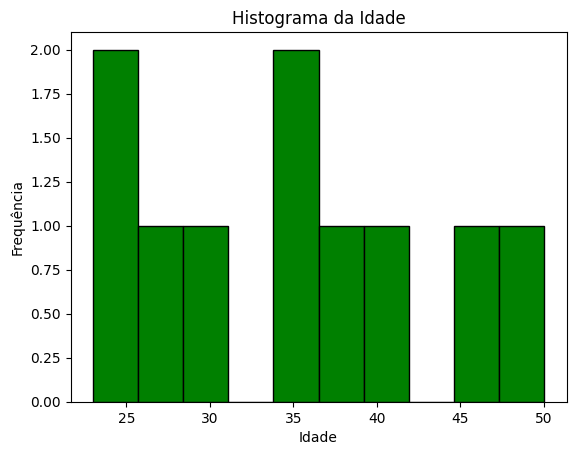

In [ ]:
plt.hist(df_saude['age'], bins=10, color='green', edgecolor='black')
plt.title('Histograma da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

3. Criar um gráfico de dispersão mostrando a relação entre 'height' e 'weight' usando Seaborn.

In [ ]:
fig = px.scatter(df_saude, x='height', y='weight', title='Relação entre Altura e Peso')

fig.update_traces(marker=dict(size=10,
                              color='LightSkyBlue',
                              line=dict(width=2, color='DarkSlateGrey')))

fig.show()

4. Criar um gráfico interativo de barras mostrando a contagem de indivíduos por
'gender' usando Plotly.

In [ ]:
fig = px.bar(df_saude, x='gender', title='Contagem de Indivíduos por Gênero')

fig.show()

# Desafio Prático 2: Séries Temporais


Descrição: Neste desafio, suas alunas irão analisar uma série temporal de dados de vendas. Elas deverão criar gráficos que mostrem as vendas ao longo do tempo, identificar tendências e sazonalidades.


# Tarefas:
1. Carregar os dados de um arquivo CSV fornecido (vendas.csv).


In [ ]:
df_vendas = pd.read_csv('vendas.csv')

In [ ]:
df_vendas.head()

,date,sales
0,2023-01-01,100
1,2023-01-02,150
2,2023-01-03,200
3,2023-01-04,130
4,2023-01-05,180


2. Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib

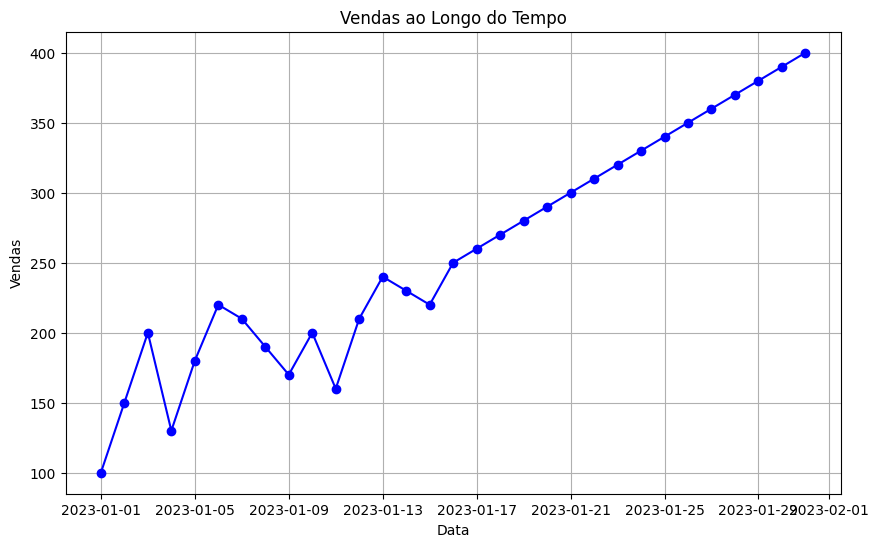

In [ ]:
df_vendas['date'] = pd.to_datetime(df_vendas['date'])

plt.figure(figsize=(10, 6))
plt.plot(df_vendas['date'], df_vendas['sales'], color='blue', marker='o', linestyle='-')
plt.title('Vendas ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.grid(True)
plt.show()

3. Criar um gráfico de decomposição sazonal usando Seaborn.


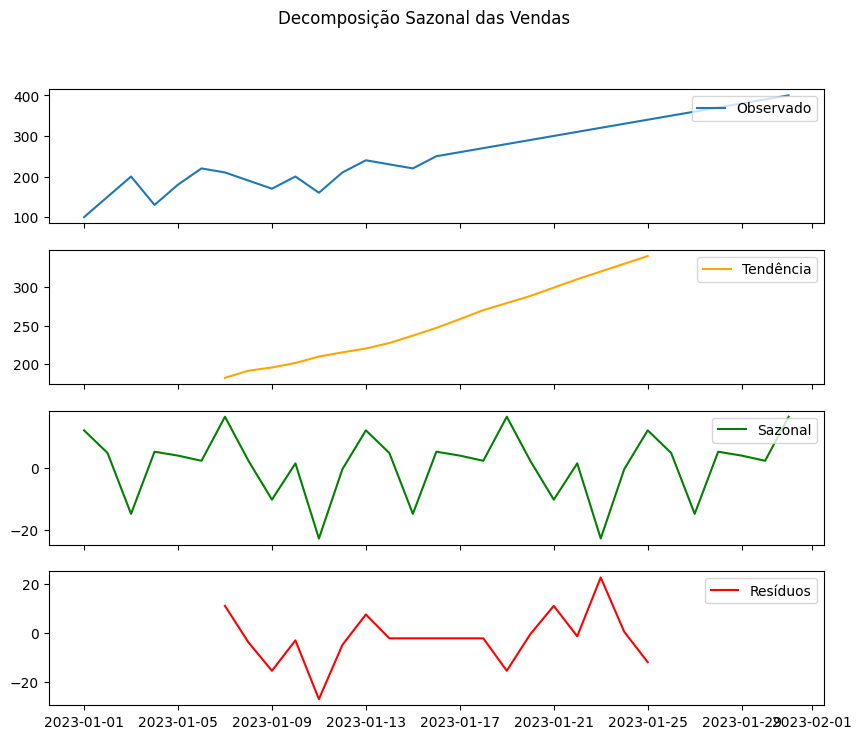

In [ ]:
# Não encontrei a opção de fazer esse gráfico utilizando a biblioteca Seaborn então fiz com Statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

# Converter a coluna 'date' para o índice de tempo e configurar o DataFrame
df_vendas['date'] = pd.to_datetime(df_vendas['date'])
df_vendas.set_index('date', inplace=True)

# Realizar a decomposição sazonal
decomposition = seasonal_decompose(df_vendas['sales'], model='additive', period=12)

# Plotar os componentes da decomposição
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Série original
ax1.plot(decomposition.observed, label='Observado')
ax1.legend(loc='upper right')

# Componente de tendência
ax2.plot(decomposition.trend, label='Tendência', color='orange')
ax2.legend(loc='upper right')

# Componente sazonal
ax3.plot(decomposition.seasonal, label='Sazonal', color='green')
ax3.legend(loc='upper right')

# Componente residual
ax4.plot(decomposition.resid, label='Resíduos', color='red')
ax4.legend(loc='upper right')

plt.suptitle('Decomposição Sazonal das Vendas')
plt.show()

4. Criar um gráfico interativo que permita a exploração dos dados de vendas ao longo do tempo usando Plotly

In [ ]:
df_vendas['date'] = pd.to_datetime(df_vendas['date'])

fig = px.line(df_vendas, x='date', y='sales', title='Vendas ao Longo do Tempo')

fig.show()